# Import Dependencies

In [1]:
#System tools
import time
import datetime
import os
import io
from dotenv import load_dotenv, find_dotenv
import pickle
import dill
import glob
import sys, getopt
from sklearn.externals.joblib import Parallel, delayed
import multiprocessing

#Database tools
import sqlalchemy as sa
import psycopg2 as p
import pandas as pd

#Math tools
import numpy as np
from collections import Counter
import itertools as it


#ML tools
from sklearn.preprocessing import normalize, scale, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from skrebate import ReliefF, MultiSURF

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_validate

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll.stochastic import sample


import eli5
from eli5.sklearn import PermutationImportance

#Class imbalance modules
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours,TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble

#Statistical Tests
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from mlxtend.evaluate import permutation_test


#Plotting and viz
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages


#User defined modules
currentWorkingDirectory = '../models/'
sys.path.append(currentWorkingDirectory)
from feature_selection_methods import chi2_fs, anova_fs, relieff_fs, multisurf_fs


# User-defined Functions

In [2]:
def plot_heatmap(data,xlabel,ylabel):
    f, ax = plt.subplots(1, 1, figsize=(8, 8), sharex=False)
    heatmap = sns.heatmap(data,vmin=0,vmax=1,annot = True, linecolor = 'black', 
                linewidth = 0.1,square = True,cmap="YlGnBu", ax = ax);

    ax.set_xlabel(xlabel, fontsize='xx-large')
    ax.xaxis.labelpad = 20
    ax.set_ylabel(ylabel, fontsize='xx-large')
    ax.yaxis.labelpad = 20    
    ax.set_yticklabels(heatmap.get_yticklabels(), rotation=360)

In [27]:
def set_tick_fontsize(ax, fs):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fs)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs)

In [4]:
def savePdf(filename,dpi=300, close_fig_when_done=True):
    pdf = PdfPages(filename)
    pdf.savefig(dpi=dpi, bbox_inches='tight', pad_inches=.15)
    pdf.close()

# Analysis

In [11]:
pd.set_option('display.max_columns', 999)

In [ ]:
file_path = '../models/'
with open(file_path+'train_data.pik', "rb") as f:
        data = dill.load(f)

## Naive Bayes

In [31]:
nb_path = '../models/results/final_results/nb.pik'
with open(nb_path, "rb") as f:
    nb_results = dill.load(f)
        

In [32]:
nb_results_df = nb_results['results_df']

In [33]:
nb_results_df.shape

(72, 8)

In [34]:
nb_results_df.head()

,Algorithm,AUCPR_CV,AUCROC_CV,NPV_CV,Precision_CV,Sensitivity_CV,Specificity_CV,F1_CV
46,class_weight_cb_anovaF_fs_01_nb,0.288874,0.780102,0.310826,0.919312,0.881042,0.397614,0.899385
25,no_cb_anovaF_fs_01_nb,0.288874,0.780102,0.310826,0.919312,0.881042,0.397614,0.899385
36,class_weight_cb_anova_reliefF_fs_01_nb,0.288702,0.779676,0.311283,0.919672,0.880815,0.400277,0.899407
68,no_cb_anova_reliefF_fs_01_nb,0.288702,0.779676,0.311283,0.919672,0.880815,0.400277,0.899407
11,rand_under_cb_chi2_multisurf_fs_01_nb,0.286386,0.763433,0.201047,0.956637,0.592147,0.786090,0.728616


In [35]:
nb_results['results']['opt_param']

{'alpha': 1.7548363072244115}

In [36]:
nb_results['results']['param_sorted'][0]

{'loss': -0.288873742496868,
 'loss_cv': [0.32782498408946503,
  0.31966093461533907,
  0.2686911246491028,
  0.25264173125582806,
  0.27554993787460497,
  0.32782498408946503,
  0.31966093461533907,
  0.2686911246491028,
  0.25264173125582806,
  0.27554993787460497],
 'params': {'alpha': 1.7548363072244115},
 'clf_name': 'multinomial',
 'status': 'ok'}

In [37]:
count = []
for i in range(len(nb_results['results']['cv_data'])):
    count.append(len(nb_results['results']['cv_data'][i][4]))
print('mean', np.mean(count))
print('min',min(count))
print('max',max(count))

mean 110.6
min 99
max 123


## K Nearest Neighbors

In [38]:
knn_path = '../models/results/final_results/knn.pik'
with open(knn_path, "rb") as f:
    knn_results = dill.load(f)
        

In [39]:
knn_results_df = knn_results['results_df']

In [40]:
knn_results_df.shape

(72, 8)

In [41]:
knn_results_df.head()

,Algorithm,AUCPR_CV,AUCROC_CV,NPV_CV,Precision_CV,Sensitivity_CV,Specificity_CV,F1_CV
51,rand_under_cb_multisurf_fs_01_knn,0.396224,0.823088,0.212436,0.974819,0.570787,0.881591,0.716120
38,tomek_enn_cb_chi2_reliefF_fs_01_knn,0.395810,0.829388,0.457442,0.915089,0.951031,0.312775,0.932612
54,class_weight_cb_no_fs_01_knn,0.395264,0.826622,NaN,0.886048,1.000000,0.000000,0.939582
23,no_cb_no_fs_01_knn,0.395264,0.826622,NaN,0.886048,1.000000,0.000000,0.939582
59,renn_cb_chi2_reliefF_fs_01_knn,0.395140,0.826170,0.357797,0.938990,0.867301,0.560072,0.901354


In [42]:
knn_results['results']['opt_param']

{'n_neighbors': 257, 'p': 2, 'weights': 'distance'}

In [43]:
count = []
for i in range(len(knn_results['results']['cv_data'])):
    count.append(len(knn_results['results']['cv_data'][i][4]))
print('mean', np.mean(count))
print('min',min(count))
print('max',max(count))

mean 426.4
min 413
max 442


## Logistic Regression

In [44]:
lr_path = '../models/results/final_results/lr.pik'
with open(lr_path, "rb") as f:
    lr_results = dill.load(f)
        

In [45]:
lr_results_df = lr_results['results_df']

In [46]:
lr_results_df.shape

(72, 8)

In [47]:
lr_results_df.head()

,Algorithm,AUCPR_CV,AUCROC_CV,NPV_CV,Precision_CV,Sensitivity_CV,Specificity_CV,F1_CV
19,rand_under_cb_chi2_reliefF_fs_01_lr,0.416636,0.837200,0.280497,0.965214,0.732110,0.791486,0.831066
0,no_cb_no_fs_01_lr,0.415453,0.842485,0.531855,0.900619,0.981821,0.157292,0.939444
6,tomek_cb_no_fs_01_lr,0.415116,0.842494,0.530699,0.902418,0.979663,0.175857,0.939422
56,rand_under_cb_anova_multisurf_fs_01_lr,0.414986,0.838051,0.282536,0.963318,0.738358,0.777365,0.834173
27,rand_under_cb_chi2_multisurf_fs_01_lr,0.414831,0.837017,0.280839,0.965606,0.732111,0.794129,0.831307


In [48]:
lr_results['results']['opt_param']

{'C': 0.142544469107113, 'penalty': 'l2'}

In [49]:
count = []
for i in range(len(lr_results['results']['cv_data'])):
    count.append(len(lr_results['results']['cv_data'][i][4]))
print('mean', np.mean(count))
print('min',min(count))
print('max',max(count))

mean 38.4
min 33
max 43


### Without regularization

In [50]:
lr_noreg_path = '../models/results/lr_noreg/no_reg_rand_under_cb_no_fs_01_lr_results.pik'
with open(lr_noreg_path, "rb") as f:
    lr_noreg_results = dill.load(f)

In [51]:
lr_noreg_results['param_sorted'][0]

{'loss': -0.2847386074608201,
 'loss_cv': [0.2972928077667766,
  0.35665211531766744,
  0.2504588620002923,
  0.273384368271169,
  0.2459048839481951,
  0.2972928077667766,
  0.35665211531766744,
  0.2504588620002923,
  0.273384368271169,
  0.2459048839481951],
 'params': {'penalty': 'none', 'solver': 'lbfgs'},
 'status': 'ok'}

## Random Forest

In [52]:
rf_path = '../models/results/final_results/rf.pik'
with open(rf_path, "rb") as f:
    rf_results = dill.load(f)
        

In [53]:
rf_results_df = rf_results['results_df']

In [54]:
rf_results_df.shape

(72, 8)

In [55]:
rf_results_df.head()

,Algorithm,AUCPR_CV,AUCROC_CV,NPV_CV,Precision_CV,Sensitivity_CV,Specificity_CV,F1_CV
20,tomek_cb_no_fs_01_rf,0.419991,0.846395,0.604879,0.896328,0.989888,0.109598,0.940770
30,no_cb_no_fs_01_rf,0.419183,0.845577,0.636283,0.890929,0.994659,0.053051,0.939926
71,tomek_cb_reliefF_fs_01_rf,0.418995,0.841151,0.587588,0.895401,0.989888,0.100764,0.940261
10,no_cb_reliefF_fs_01_rf,0.418485,0.846509,0.607751,0.891839,0.992841,0.063651,0.939617
35,class_weight_cb_reliefF_fs_01_rf,0.418248,0.843854,0.354029,0.949764,0.841171,0.651094,0.891462


In [56]:
rf_results['results']['opt_param']

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 0.2,
 'min_samples_leaf': 6,
 'n_estimators': 1067}

In [57]:
count = []
for i in range(len(rf_results['results']['cv_data'])):
    count.append(len(rf_results['results']['cv_data'][i][4]))
print('mean', np.mean(count))
print('min',min(count))
print('max',max(count))

mean 648.0
min 648
max 648


## XGBoost

In [58]:
xgb_path = '../models/results/final_results/xgb.pik'
with open(xgb_path, "rb") as f:
    xgb_results = dill.load(f)
        

In [59]:
xgb_results_df = xgb_results['results_df']

In [60]:
xgb_results_df.shape

(72, 8)

In [61]:
xgb_results_df.head()

,Algorithm,AUCPR_CV,AUCROC_CV,NPV_CV,Precision_CV,Sensitivity_CV,Specificity_CV,F1_CV
30,class_weight_cb_no_fs_01_xgb,0.427211,0.848164,0.527661,0.903822,0.978072,0.190016,0.939435
2,tomek_cb_no_fs_01_xgb,0.427174,0.847557,0.527788,0.906227,0.975004,0.214736,0.939307
46,no_cb_no_fs_01_xgb,0.427145,0.847144,0.551084,0.904980,0.978526,0.200593,0.940280
53,tomek_cb_chi2_fs_01_xgb,0.426628,0.845993,0.564819,0.904195,0.979321,0.192624,0.940213
33,no_cb_reliefF_fs_01_xgb,0.426132,0.848998,0.560541,0.902166,0.982048,0.171436,0.940380


In [62]:
xgb_results['results']['opt_param']

{'colsample_bytree': 0.10080281220639958,
 'gamma': 0.33897251390707017,
 'learning_rate': 0.49908411793649976,
 'max_depth': 84,
 'min_child_weight': 39.0,
 'n_estimators': 652,
 'reg_alpha': 10,
 'reg_lambda': 100,
 'scale_pos_weight': 1.0,
 'subsample': 0.4924564464301474}

In [63]:
count = []
for i in range(len(xgb_results['results']['cv_data'])):
    count.append(len(xgb_results['results']['cv_data'][i][4]))
print('mean', np.mean(count))
print('min',min(count))
print('max',max(count))

mean 648.0
min 648
max 648


## Plot AUC PR plots

In [64]:
def median_idx_results(results):
    cv_arr = results['results']['param_sorted'][0]['loss_cv']
    idx = cv_arr.index(np.percentile(cv_arr,50,interpolation='nearest'))
    y_prob = results['results']['cv_pred_prob'][idx]
    y_test = results['results']['cv_data'][idx][3]
    return idx, y_prob, y_test

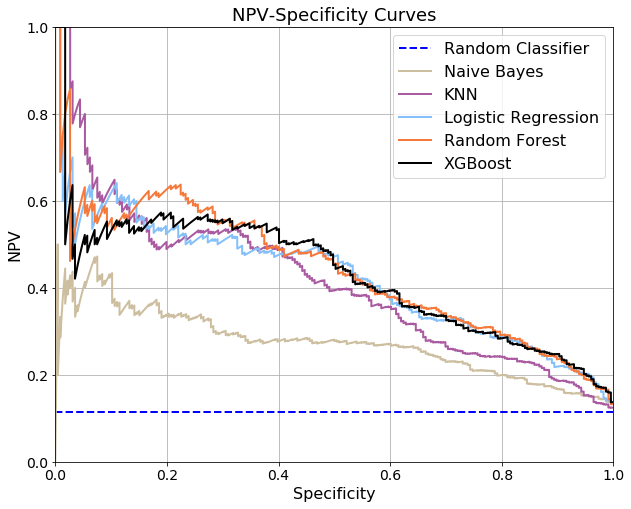

In [65]:
LABEL_FONT_SIZE = 16
TITLE_FONT_SIZE = 18
LEGEND_FONT_SIZE = 16
TICK_FONT_SIZE = 14
MULTI_FIG_SIZE = (16, 14)
SINGLE_FIG_SIZE = (10,8)
MARKER_SIZE = 10

fig, ax = plt.subplots(1, 1, figsize=SINGLE_FIG_SIZE)
lw = 2

x = np.linspace(0,1,100)

#Random Classifier
ax.plot(x,np.zeros(100)+(Counter(data['y'])[0]/(Counter(data['y'])[0]+Counter(data['y'])[1])),'--b', lw = lw, label='Random Classifier')

#Naive Bayes
idx, y_prob, y_test = median_idx_results(nb_results)

test_y_flipped = abs(np.array(y_test)-1)

precision1, recall1, threshold1 = precision_recall_curve(test_y_flipped, y_prob[:,0])
threshold1 = 1-threshold1

ax.plot(recall1, precision1, '#CCBE9F', lw = lw, label='Naive Bayes')

nb_med_perf = nb_results['results']['param_sorted'][0]['loss_cv'][idx]

#K Nearest Neighbors
idx, y_prob, y_test = median_idx_results(knn_results)

test_y_flipped = abs(np.array(y_test)-1)

precision2, recall2, threshold2 = precision_recall_curve(test_y_flipped, y_prob[:,0])
threshold2 = 1-threshold2

ax.plot(recall2, precision2, '#A95AA1', lw = lw, label='KNN')

knn_med_perf = knn_results['results']['param_sorted'][0]['loss_cv'][idx]

#Logistic Regression
idx, y_prob, y_test = median_idx_results(lr_results)

test_y_flipped = abs(np.array(y_test)-1)

precision3, recall3, threshold3 = precision_recall_curve(test_y_flipped, y_prob[:,0])
threshold3 = 1-threshold3

ax.plot(recall3, precision3, '#85C0F9', lw = lw, label='Logistic Regression')

lr_med_perf = lr_results['results']['param_sorted'][0]['loss_cv'][idx]

#Random Forest
idx, y_prob, y_test = median_idx_results(rf_results)

test_y_flipped = abs(np.array(y_test)-1)

precision4, recall4, threshold4 = precision_recall_curve(test_y_flipped, y_prob[:,0])
threshold4 = 1-threshold4

ax.plot(recall4, precision4, '#F5793A', lw = lw, label='Random Forest')

rf_med_perf = rf_results['results']['param_sorted'][0]['loss_cv'][idx]

#XGBoost
idx, y_prob, y_test = median_idx_results(xgb_results)

test_y_flipped = abs(np.array(y_test)-1)

precision5, recall5, threshold5 = precision_recall_curve(test_y_flipped, y_prob[:,0])
threshold5 = 1-threshold5

ax.plot(recall5, precision5, 'black', lw = lw, label='XGBoost')

xgb_med_perf = xgb_results['results']['param_sorted'][0]['loss_cv'][idx]

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_xlabel('Specificity', fontsize=LABEL_FONT_SIZE)
ax.set_ylabel('NPV', fontsize=LABEL_FONT_SIZE)
set_tick_fontsize(ax, TICK_FONT_SIZE)
ax.set_title('NPV-Specificity Curves', fontsize=TITLE_FONT_SIZE)
ax.legend(loc="upper right", fontsize=LEGEND_FONT_SIZE)
ax.grid();


In [66]:
img_out_path = '../reports/figures/'
fig.savefig(img_out_path+'npv_specificity_cb.pdf', dpi=300, bbox_inches='tight', pad_inches=.15)

In [67]:
#Median metrics
print('nb',nb_med_perf)
print('knn',knn_med_perf)
print('lr',lr_med_perf)
print('rf',rf_med_perf)
print('xgb',xgb_med_perf)

nb 0.27554993787460497
knn 0.4128259490000769
lr 0.42465210483513366
rf 0.4403034188335825
xgb 0.430101677061313


In [68]:
def print_mean_range(results):
    cv_arr = results['results']['param_sorted'][0]['loss_cv']
    avg = np.round(np.mean(cv_arr),2)
    low = np.round(min(cv_arr),2)
    high = np.round(max(cv_arr),2)
    return avg,low,high

print(print_mean_range(nb_results))
print(print_mean_range(knn_results))
print(print_mean_range(lr_results))
print(print_mean_range(rf_results))
print(print_mean_range(xgb_results))

(0.29, 0.25, 0.33)
(0.4, 0.32, 0.43)
(0.42, 0.35, 0.45)
(0.42, 0.34, 0.45)
(0.43, 0.38, 0.45)


## Cnf Matrix Results

In [69]:
alg_arr = ['nb','knn','lr','rf','xgb']


In [70]:
def print_cnf_results(results_df):
    npv_arr = []
    prec_arr = []
    recall_arr = []
    acc_arr = []

    for fold in range(len(results_df['results']['cv_pred_prob'])):
        y_prob = results_df['results']['cv_pred_prob'][fold]
        y_test = results_df['results']['cv_data'][fold][3]
        test_y_flipped = abs(np.array(y_test)-1)

        _, recall, threshold = precision_recall_curve(test_y_flipped, y_prob[:,0])
        threshold = 1-threshold

        spec_cutoff_id = np.where(np.array(recall)>=0.7)[0][-1]
        threshold = threshold[spec_cutoff_id]

        y_pred = np.array([int(j>=threshold) for j in y_prob[:,1]])

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        npv = np.round(tn/(tn+fn),2)
        npv_arr.append(npv)

        precision = np.round(tp/(tp+fp),2)
        prec_arr.append(precision)


        recall = np.round(tp/(tp+fn),2)
        recall_arr.append(recall)

        accuracy = np.round((tp+tn)/(tp+tn+fp+fn),2)
        acc_arr.append(accuracy)

    print(np.round(np.mean(npv_arr),2),np.min(npv_arr),np.max(npv_arr))
    print(np.round(np.mean(prec_arr),2),np.min(prec_arr),np.max(prec_arr))
    print(np.round(np.mean(recall_arr),2),np.min(recall_arr),np.max(recall_arr))
    print(np.round(np.mean(acc_arr),2),np.min(acc_arr),np.max(acc_arr))


In [71]:
print_cnf_results(nb_results)

0.25 0.22 0.29
0.95 0.95 0.95
0.72 0.69 0.78
0.72 0.69 0.77


In [72]:
print_cnf_results(knn_results)

0.29 0.26 0.32
0.95 0.95 0.95
0.78 0.74 0.81
0.77 0.74 0.8


In [73]:
print_cnf_results(lr_results)

0.32 0.31 0.33
0.95 0.95 0.96
0.81 0.8 0.81
0.8 0.78 0.8


In [74]:
print_cnf_results(rf_results)

0.33 0.3 0.35
0.95 0.95 0.96
0.82 0.79 0.83
0.81 0.78 0.82


In [75]:
print_cnf_results(xgb_results)

0.34 0.32 0.35
0.95 0.95 0.96
0.82 0.81 0.83
0.81 0.8 0.82


In [76]:
alg_arr = ['nb','knn','lr','rf','xgb']

spec_arr = []
spec_arr.append((list(recall1),list(recall2),list(recall3),list(recall4),list(recall5)))
spec_arr = np.asarray(spec_arr[0])

thresh_arr = []
thresh_arr.append((list(threshold1),list(threshold2),list(threshold3),list(threshold4),list(threshold5)))
thresh_arr = np.asarray(thresh_arr[0])

y_test = []
pred_prob_arr = []

_, y_prob_1, yt1 = median_idx_results(nb_results)
y_test.append(yt1)
pred_prob_arr.append(y_prob_1[:,1])

_, y_prob_2, yt2 = median_idx_results(knn_results)
y_test.append(yt2)
pred_prob_arr.append(y_prob_2[:,1])

_, y_prob_3, yt3 = median_idx_results(lr_results)
y_test.append(yt3)
pred_prob_arr.append(y_prob_3[:,1])

_, y_prob_4, yt4 = median_idx_results(rf_results)
y_test.append(yt4)
pred_prob_arr.append(y_prob_4[:,1])

_, y_prob_5, yt5 = median_idx_results(xgb_results)
y_test.append(yt5)
pred_prob_arr.append(y_prob_5[:,1])


npv_arr = []
prec_arr = []
sens_arr = []
recall_arr = []
acc_arr = []
for i in range(len(alg_arr)):
    spec_cutoff_id = np.where(np.array(spec_arr[i])>=0.7)[0][-1]
    threshold = thresh_arr[i][spec_cutoff_id]
    y_prob = pred_prob_arr[i]
    y_pred = np.array([int(j>=threshold) for j in y_prob])
    tn, fp, fn, tp = confusion_matrix(y_test[i], y_pred).ravel()
    
    npv = np.round(tn/(tn+fn),2)
    npv_arr.append(npv)
    
    precision = np.round(tp/(tp+fp),2)
    prec_arr.append(precision)
    
  
    recall = np.round(tp/(tp+fn),2)
    recall_arr.append(recall)
    
    accuracy = np.round((tp+tn)/(tp+tn+fp+fn),2)
    acc_arr.append(accuracy)
    
    
    


In [77]:
cnf_results = list(zip(alg_arr,npv_arr,prec_arr,recall_arr,acc_arr))

In [78]:
cnf_results_df = pd.DataFrame(cnf_results,columns=['alg','npv','prec','recall','acc'])

In [79]:
cnf_results_df

,alg,npv,prec,recall,acc
0,nb,0.23,0.95,0.70,0.70
1,knn,0.27,0.95,0.75,0.75
2,lr,0.33,0.95,0.81,0.80
3,rf,0.34,0.95,0.83,0.81
4,xgb,0.33,0.95,0.82,0.81


## ROC Curve

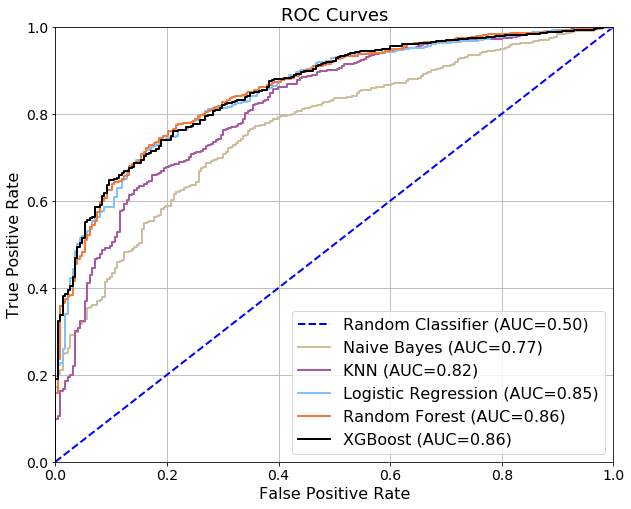

In [81]:
LABEL_FONT_SIZE = 16
TITLE_FONT_SIZE = 18
LEGEND_FONT_SIZE = 16
TICK_FONT_SIZE = 14
MULTI_FIG_SIZE = (16, 14)
SINGLE_FIG_SIZE = (10,8)
MARKER_SIZE = 10

fig, ax = plt.subplots(1, 1, figsize=SINGLE_FIG_SIZE)
lw = 2

x = np.linspace(0,1,100)

#Random Classifier
ax.plot(x,x,'--b', lw= lw, label='Random Classifier (AUC=0.50)')

#Naive Bayes
idx, y_prob, y_test = median_idx_results(nb_results)

fpr1, tpr1, threshold1 = roc_curve(y_test, y_prob[:,1])
roc_auc = roc_auc_score(y_test, y_prob[:,1])

ax.plot(fpr1, tpr1, '#CCBE9F', lw= lw, label='Naive Bayes (AUC={})'.format(np.round(roc_auc,2)))

#K Nearest Neighbors
idx, y_prob, y_test = median_idx_results(knn_results)

fpr2, tpr2, threshold2 = roc_curve(y_test, y_prob[:,1])
roc_auc = roc_auc_score(y_test, y_prob[:,1])

ax.plot(fpr2, tpr2, '#A95AA1', lw= lw, label='KNN (AUC={})'.format(np.round(roc_auc,2)))

#Logistic Regression
idx, y_prob, y_test = median_idx_results(lr_results)

fpr3, tpr3, threshold3 = roc_curve(y_test, y_prob[:,1])
roc_auc = roc_auc_score(y_test, y_prob[:,1])

ax.plot(fpr3, tpr3, '#85C0F9', lw= lw, label='Logistic Regression (AUC={})'.format(np.round(roc_auc,2)))


#Random Forest
idx, y_prob, y_test = median_idx_results(rf_results)

fpr4, tpr4, threshold4 = roc_curve(y_test, y_prob[:,1])
roc_auc = roc_auc_score(y_test, y_prob[:,1])

ax.plot(fpr4, tpr4, '#F5793A', lw= lw, label='Random Forest (AUC={})'.format(np.round(roc_auc,2)))

#XGBoost
idx, y_prob, y_test = median_idx_results(xgb_results)

fpr5, tpr5, threshold5 = roc_curve(y_test, y_prob[:,1])
roc_auc = roc_auc_score(y_test, y_prob[:,1])

ax.plot(fpr5, tpr5, 'black', lw= lw, label='XGBoost (AUC={})'.format(np.round(roc_auc,2)))

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_xlabel('False Positive Rate', fontsize=LABEL_FONT_SIZE)
ax.set_ylabel('True Positive Rate', fontsize=LABEL_FONT_SIZE)
set_tick_fontsize(ax, TICK_FONT_SIZE)
ax.set_title('ROC Curves', fontsize=TITLE_FONT_SIZE)
ax.legend(loc="lower right", fontsize=LEGEND_FONT_SIZE)
ax.grid();

In [82]:
img_out_path = '../reports/figures/'
fig.savefig(img_out_path+'roc_cb.pdf', dpi=300, bbox_inches='tight', pad_inches=.15)

## Hyperopt Convergence

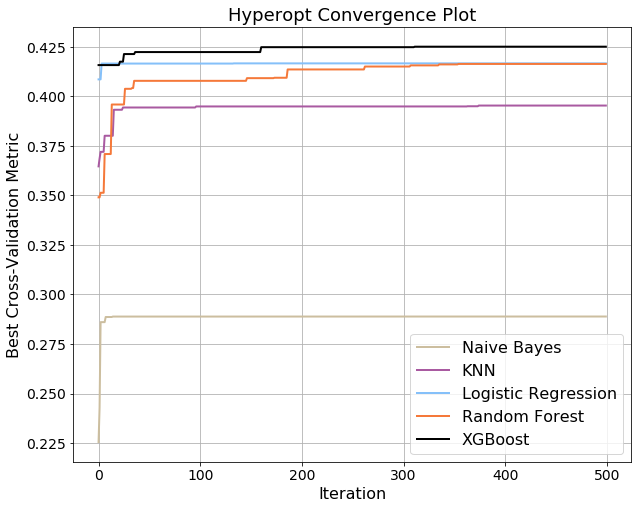

In [83]:
LABEL_FONT_SIZE = 16
TITLE_FONT_SIZE = 18
LEGEND_FONT_SIZE = 16
TICK_FONT_SIZE = 14
MULTI_FIG_SIZE = (16, 14)
SINGLE_FIG_SIZE = (10,8)
MARKER_SIZE = 10

fig, ax = plt.subplots(1, 1, figsize=SINGLE_FIG_SIZE)
lw = 2

#Naive Bayes
res_df = [{'tid':i['tid'],'loss':-i['result']['loss']} for i in nb_results['results']['trials']]
res_df = pd.DataFrame(res_df)

best_loss_1 = np.maximum.accumulate(res_df.sort_values("tid")["loss"])
ax.plot(best_loss_1.values[:500], '#CCBE9F', lw=lw, label='Naive Bayes')


#K Nearest Neighbors
res_df = [{'tid':i['tid'],'loss':-i['result']['loss']} for i in knn_results['results']['trials']]
res_df = pd.DataFrame(res_df)

best_loss_2 = np.maximum.accumulate(res_df.sort_values("tid")["loss"])
ax.plot(best_loss_2[:500], '#A95AA1', lw=lw,label='KNN')

#Logistic Regression
res_df = [{'tid':i['tid'],'loss':-i['result']['loss']} for i in lr_results['results']['trials']]
res_df = pd.DataFrame(res_df)

best_loss_3 = np.maximum.accumulate(res_df.sort_values("tid")["loss"])
ax.plot(best_loss_3[:500], '#85C0F9', lw=lw,label='Logistic Regression')


#Random Forest
res_df = [{'tid':i['tid'],'loss':-i['result']['loss']} for i in rf_results['results']['trials']]
res_df = pd.DataFrame(res_df)

best_loss_4 = np.maximum.accumulate(res_df.sort_values("tid")["loss"])
ax.plot(best_loss_4[:500], '#F5793A',lw=lw, label='Random Forest')

#XGBoost
res_df = [{'tid':i['tid'],'loss':-i['result']['loss']} for i in xgb_results['results']['trials']]
res_df = pd.DataFrame(res_df)

best_loss_5 = np.maximum.accumulate(res_df.sort_values("tid")["loss"])
ax.plot(best_loss_5[:500], 'black',lw=lw, label='XGBoost')

#ax.set_xlim(0,1)
#ax.set_ylim(0,1)
ax.set_xlabel('Iteration', fontsize=LABEL_FONT_SIZE)
ax.set_ylabel('Best Cross-Validation Metric', fontsize=LABEL_FONT_SIZE)
set_tick_fontsize(ax, TICK_FONT_SIZE)
ax.set_title('Hyperopt Convergence Plot', fontsize=TITLE_FONT_SIZE)
ax.legend(loc="lower right", fontsize=LEGEND_FONT_SIZE)
ax.grid()
# ax.set(xlabel="Iteration",ylabel="Best validation Average Precision")
# ax.legend();



In [84]:
img_out_path = '../reports/figures/'
fig.savefig(img_out_path+'hyperopt_convergence_cb.pdf', dpi=300, bbox_inches='tight', pad_inches=.15)

## Permutation Analysis

In [2]:
params_xgb = {'colsample_bytree': 0.10080281220639958,
 'gamma': 0.33897251390707017,
 'learning_rate': 0.49908411793649976,
 'max_depth': 84,
 'min_child_weight': 39.0,
 'n_estimators': 652,
 'reg_alpha': 10,
 'reg_lambda': 100,
 'scale_pos_weight': 1.0,
 'subsample': 0.4924564464301474}
clf_xgb = XGBClassifier(**params_xgb, n_jobs=-1, random_state = 0)

In [17]:
#Permutation on test data of the median performance split

idx, _,_ = median_idx_results(xgb_results)

X_train = xgb_results['results']['cv_data'][idx][0]
y_train = xgb_results['results']['cv_data'][idx][1]
X_test = xgb_results['results']['cv_data'][idx][2]
y_test = xgb_results['results']['cv_data'][idx][3]

cont_idx = []
for i in range(X_train.shape[1]):
    if len(set(X_train[:,i])) >2:
        cont_idx.append(i)

scaler = StandardScaler()
X_train[:,cont_idx] = scaler.fit_transform(X_train[:,cont_idx])
X_test[:,cont_idx] = scaler.transform(X_test[:,cont_idx])
X_df = data['X_df']

In [90]:
xgb = clf_xgb.fit(X_train,np.abs(y_train-1))

perm_xgb = PermutationImportance(xgb,scoring='average_precision',random_state=0).fit(X_test, np.abs(y_test-1))

eli5.show_weights(perm_xgb,feature_names = X_df.columns.values)

Weight,Feature
0.1355 ± 0.0262,age_last_asthma
0.0947 ± 0.0406,num_asthma_visits
0.0366 ± 0.0126,proc_2314047
0.0257 ± 0.0220,num_non_asthma_visits
0.0171 ± 0.0128,meas_3028406
0.0137 ± 0.0087,race_Black or African American
0.0096 ± 0.0052,age_first_asthma
0.0093 ± 0.0046,race_White
0.0071 ± 0.0026,drug_21603497
0.0063 ± 0.0060,edc_ALL03


In [19]:
results = list(zip(perm_xgb.feature_importances_, 2*perm_xgb.feature_importances_std_, X_df.columns.values))

In [20]:
results_sorted = sorted(results, key=lambda x: x[0], reverse=True)

In [21]:
feat_imp_df = pd.DataFrame(results_sorted, columns= ['Value','Confidence','Name'] )

In [22]:
feat_imp_df.head()

,Value,Confidence,Name
0,0.135541,0.026229,age_last_asthma
1,0.094655,0.040639,num_asthma_visits
2,0.036573,0.012641,proc_2314047
3,0.025736,0.022011,num_non_asthma_visits
4,0.017080,0.012776,meas_3028406


In [23]:
feat_imp_plot = feat_imp_df.iloc[:15,:].sort_values(by='Value')

In [24]:
feat_imp_plot

,Value,Confidence,Name
14,0.002198,0.003705,edc_SKN02
13,0.002367,0.000702,edc_GSU09
12,0.003120,0.000982,proc_2514424
11,0.005345,0.003274,drug_21604344
10,0.005692,0.006008,drug_21603356
9,0.006322,0.006016,edc_ALL03
8,0.007109,0.002566,drug_21603497
7,0.009287,0.004560,race_White
6,0.009586,0.005191,age_first_asthma
5,0.013702,0.008733,race_Black or African American


proc_2314047 - "Noninvasive ear or pulse oximetry for oxygen saturation; single determination"
proc_2313735 - "Tympanometry (impedance testing)"
proc_2514424 - "Inpatient consultation for a new or established patient, which requires these 3 key components: A comprehensive history; A comprehensive examination; and Medical decision making of high complexity. Counseling and/or coordination of care with other physici"

meas_3028406 - "Lead [Mass/volume] in Capillary blood"

edc_ALL03 - "Allergic rhinitis"  
edc_GSU09 - "Nonfungal infections of skin and subcutaneous tissue"
edc_SKN02 - "Dermatitis and eczema"

drug_21602823 - Amoxicillin  
drug_21604344 - Acetaminophen  
drug_21603497 - cetirizine hydrochloride  
drug_21603356 - montelukast  

In [25]:
feat_imp_plot.loc[:]['Name'] = ['Dermatitis and eczema','Nonfungal infections of skin','Inpatient Consultation',
                                'Acetaminophen', 'Montelukast','Allergic Rhinitis',
                                'Cetirizine Hydrochloride','White (Race)','Age at first asthma diagnosis',
                                'Black (Race)','Capillary blood lead test','Number of non-asthma related visits',
                                'Noninvasive pulse oximetry','Number of asthma related visits','Age at last asthma diagnosis']

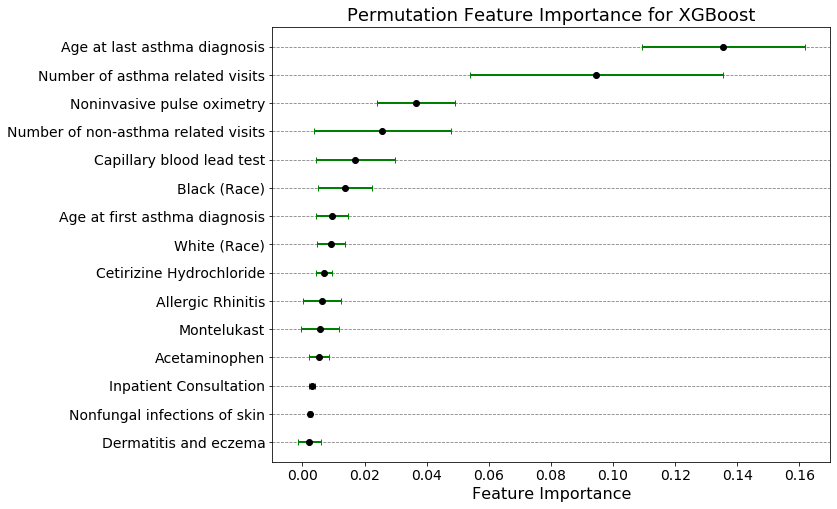

In [28]:
LABEL_FONT_SIZE = 16
TITLE_FONT_SIZE = 18
LEGEND_FONT_SIZE = 16
TICK_FONT_SIZE = 14
MULTI_FIG_SIZE = (16, 14)
SINGLE_FIG_SIZE = (10,8)
MARKER_SIZE = 10

fig, ax = plt.subplots(1, 1, figsize=SINGLE_FIG_SIZE)
lw = 2

plt.errorbar(feat_imp_plot['Value'],feat_imp_plot['Name'],
             xerr=feat_imp_plot['Confidence'].values,fmt='ok', capsize=3, ecolor = 'green', lw=lw);
ax.set_xlabel(xlabel='Feature Importance', fontsize=LABEL_FONT_SIZE)
ax.set_axisbelow(True)
set_tick_fontsize(ax, TICK_FONT_SIZE)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_title('Permutation Feature Importance for XGBoost', fontsize=TITLE_FONT_SIZE);



In [30]:
img_out_path = '../reports/figures/'
fig.savefig(img_out_path+'perm_feat_imp.pdf', dpi=300, bbox_inches='tight', pad_inches=.15)

## Statistical Test

### Friedman Rank Sum Test

In [62]:
stat_results = []
stat_results.append(nb_results['results'])
stat_results.append(knn_results['results'])
stat_results.append(lr_results['results'])
stat_results.append(rf_results['results'])
stat_results.append(xgb_results['results'])


In [63]:
[i['algo'] for i in stat_results]

['class_weight_cb_anovaF_fs_01_nb',
 'rand_under_cb_multisurf_fs_01_knn',
 'rand_under_cb_chi2_reliefF_fs_01_lr',
 'tomek_cb_no_fs_01_rf',
 'class_weight_cb_no_fs_01_xgb']

In [64]:
apr_matrix = np.array([])
for i in range(len(stat_results)):
    apr_matrix = np.append(apr_matrix,stat_results[i]['param_sorted'][0]['loss_cv'])


In [65]:
apr_matrix

array([0.32782498, 0.31966093, 0.26869112, 0.25264173, 0.27554994,
       0.32782498, 0.31966093, 0.26869112, 0.25264173, 0.27554994,
       0.38818858, 0.42945617, 0.31834931, 0.41282595, 0.43230174,
       0.38818858, 0.42945617, 0.31834931, 0.41282595, 0.43230174,
       0.4246521 , 0.44678653, 0.34584455, 0.42243618, 0.44346046,
       0.4246521 , 0.44678653, 0.34584455, 0.42243618, 0.44346046,
       0.44030342, 0.45154609, 0.34379869, 0.42283482, 0.44344842,
       0.44338317, 0.44720837, 0.34610662, 0.4163294 , 0.44494868,
       0.43010168, 0.44721667, 0.3795617 , 0.42718637, 0.45198958,
       0.43010168, 0.44721667, 0.3795617 , 0.42718637, 0.45198958])

In [66]:
apr_matrix = np.reshape(apr_matrix,(len(stat_results),len(stat_results[0]['param_sorted'][0]['loss_cv'])))

In [67]:
apr_matrix = np.vstack((apr_matrix,[0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11]))

In [68]:
apr_matrix

array([[0.32782498, 0.31966093, 0.26869112, 0.25264173, 0.27554994,
        0.32782498, 0.31966093, 0.26869112, 0.25264173, 0.27554994],
       [0.38818858, 0.42945617, 0.31834931, 0.41282595, 0.43230174,
        0.38818858, 0.42945617, 0.31834931, 0.41282595, 0.43230174],
       [0.4246521 , 0.44678653, 0.34584455, 0.42243618, 0.44346046,
        0.4246521 , 0.44678653, 0.34584455, 0.42243618, 0.44346046],
       [0.44030342, 0.45154609, 0.34379869, 0.42283482, 0.44344842,
        0.44338317, 0.44720837, 0.34610662, 0.4163294 , 0.44494868],
       [0.43010168, 0.44721667, 0.3795617 , 0.42718637, 0.45198958,
        0.43010168, 0.44721667, 0.3795617 , 0.42718637, 0.45198958],
       [0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
        0.11      , 0.11      , 0.11      , 0.11      , 0.11      ]])

In [69]:
np.mean(apr_matrix,axis=1)

array([0.28887374, 0.39622435, 0.41663596, 0.41999077, 0.4272112 ,
       0.11      ])

In [70]:
chi2,p = friedmanchisquare(*apr_matrix)

In [71]:
chi2,p

(47.08571428571429, 5.4573949492623e-09)

### Two-sided exact permutation test

In [72]:
alg_names = ['Naive Bayes', 'K-Nearest Neighbors','Logistic Regression', 'Random Forest', 'XGBoost', 'Random Classifier']

In [73]:
combs = it.combinations(range(len(apr_matrix)), 2)
p_two_way_arr = np.ones((len(alg_names),len(alg_names)))
for i, j in combs:
    p = permutation_test(apr_matrix[i], apr_matrix[j], method='exact',seed=0)
    print(p)
    p_two_way_arr[i,j] = p


0.0001515512351425664
0.0
0.0
0.0
0.0
0.2904912425036264
0.22875576435947953
0.07519106280716188
0.0
0.8020091363744615
0.49571326506311025
0.0
0.640672021476975
0.0
0.0


In [75]:
def symmetrize(a):
    return a + a.T - np.ones((len(a),len(a)))

In [76]:
p_two_way_arr = symmetrize(p_two_way_arr)

In [77]:
p_two_way_df = pd.DataFrame(p_two_way_arr)

In [79]:
p_two_way_df.index = alg_names
p_two_way_df.columns = alg_names

In [80]:
p_two_way_df

,Naive Bayes,K-Nearest Neighbors,Logistic Regression,Random Forest,XGBoost,Random Classifier
Naive Bayes,1.000000,0.000152,0.000000,0.000000,0.000000,0.0
K-Nearest Neighbors,0.000152,1.000000,0.290491,0.228756,0.075191,0.0
Logistic Regression,0.000000,0.290491,1.000000,0.802009,0.495713,0.0
Random Forest,0.000000,0.228756,0.802009,1.000000,0.640672,0.0
XGBoost,0.000000,0.075191,0.495713,0.640672,1.000000,0.0
Random Classifier,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


### One-Sided exact permutation test

In [81]:
combs = it.combinations(range(len(apr_matrix)), 2)
p_lgr_arr = np.ones((len(alg_names),len(alg_names)))
for i, j in combs:
    p = permutation_test(apr_matrix[i], apr_matrix[j], method='exact',seed=0, func = 'x_mean < y_mean')
    print(p)
    p_lgr_arr[i,j] = p


7.57756175712832e-05
0.0
0.0
0.0
0.9999945874558878
0.1452456212518132
0.11437788217973976
0.03759553140358094
0.9999945874558878
0.40100456818723074
0.24785663253155513
0.9999945874558878
0.3203360107384875
0.9999945874558878
0.9999945874558878


In [82]:
p_lgr_arr = symmetrize(p_lgr_arr)

p_lgr_df = pd.DataFrame(p_lgr_arr)

p_lgr_df.index = alg_names
p_lgr_df.columns = alg_names

p_lgr_df

,Naive Bayes,K-Nearest Neighbors,Logistic Regression,Random Forest,XGBoost,Random Classifier
Naive Bayes,1.000000,0.000076,0.000000,0.000000,0.000000,0.999995
K-Nearest Neighbors,0.000076,1.000000,0.145246,0.114378,0.037596,0.999995
Logistic Regression,0.000000,0.145246,1.000000,0.401005,0.247857,0.999995
Random Forest,0.000000,0.114378,0.401005,1.000000,0.320336,0.999995
XGBoost,0.000000,0.037596,0.247857,0.320336,1.000000,0.999995
Random Classifier,0.999995,0.999995,0.999995,0.999995,0.999995,1.000000


In [83]:
combs = it.combinations(range(len(apr_matrix)), 2)
p_llr_arr = np.ones((len(alg_names),len(alg_names)))
for i, j in combs:
    p = permutation_test(apr_matrix[i], apr_matrix[j], method='exact',seed=0, func = 'x_mean > y_mean')
    print(p)
    p_llr_arr[i,j] = p



0.9999188118383164
0.9999945874558878
0.9999945874558878
0.9999945874558878
0.0
0.8547489662040746
0.885616705276148
0.9623990560523068
0.0
0.598990019268657
0.7521379549243327
0.0
0.6796585767174003
0.0
0.0


In [84]:
p_llr_arr = symmetrize(p_llr_arr)

p_llr_df = pd.DataFrame(p_llr_arr)

p_llr_df.index = alg_names
p_llr_df.columns = alg_names

p_llr_df

,Naive Bayes,K-Nearest Neighbors,Logistic Regression,Random Forest,XGBoost,Random Classifier
Naive Bayes,1.000000,0.999919,0.999995,0.999995,0.999995,0.0
K-Nearest Neighbors,0.999919,1.000000,0.854749,0.885617,0.962399,0.0
Logistic Regression,0.999995,0.854749,1.000000,0.598990,0.752138,0.0
Random Forest,0.999995,0.885617,0.598990,1.000000,0.679659,0.0
XGBoost,0.999995,0.962399,0.752138,0.679659,1.000000,0.0
Random Classifier,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
